In [56]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Exploring
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import learning_curve
%matplotlib inline

pd.options.display.float_format = '{:20,.2f}'.format

import seaborn as sns
import math as m
from acquire import *
from prepare_zillow import *

In [2]:
# turn_to_csv()

In [3]:
df = pd.read_csv('zillow_16_17.csv', sep='\t')

In [4]:
description_df = df[['unitcnt','propertylandusedesc',
                     'propertycountylandusecode', 'propertyzoningdesc', 'heatingorsystemdesc']]

In [5]:
df = drop_columns(df)

In [6]:
df = reindex_df(df)

In [7]:
df = dropna_fields(df)

In [8]:
df = unitcnt(df)

In [9]:
df = field_temp_drop(df)

In [10]:
df = lat_long_null_values(df)

In [11]:
df = drop_null(df)

In [12]:
df = df.dropna()

In [13]:
cols = list([
 'logerror',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'lotsizesquarefeet',
 'latitude',
 'longitude',
 'regionidcity',
 'regionidzip',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount'])

col_1 = list([
 'logerror',
 'latitude',
 'longitude',
 'regionidcity',
 'regionidzip',
 'yearbuilt'])

col_2 = list([
 'logerror',
 'yearbuilt'])

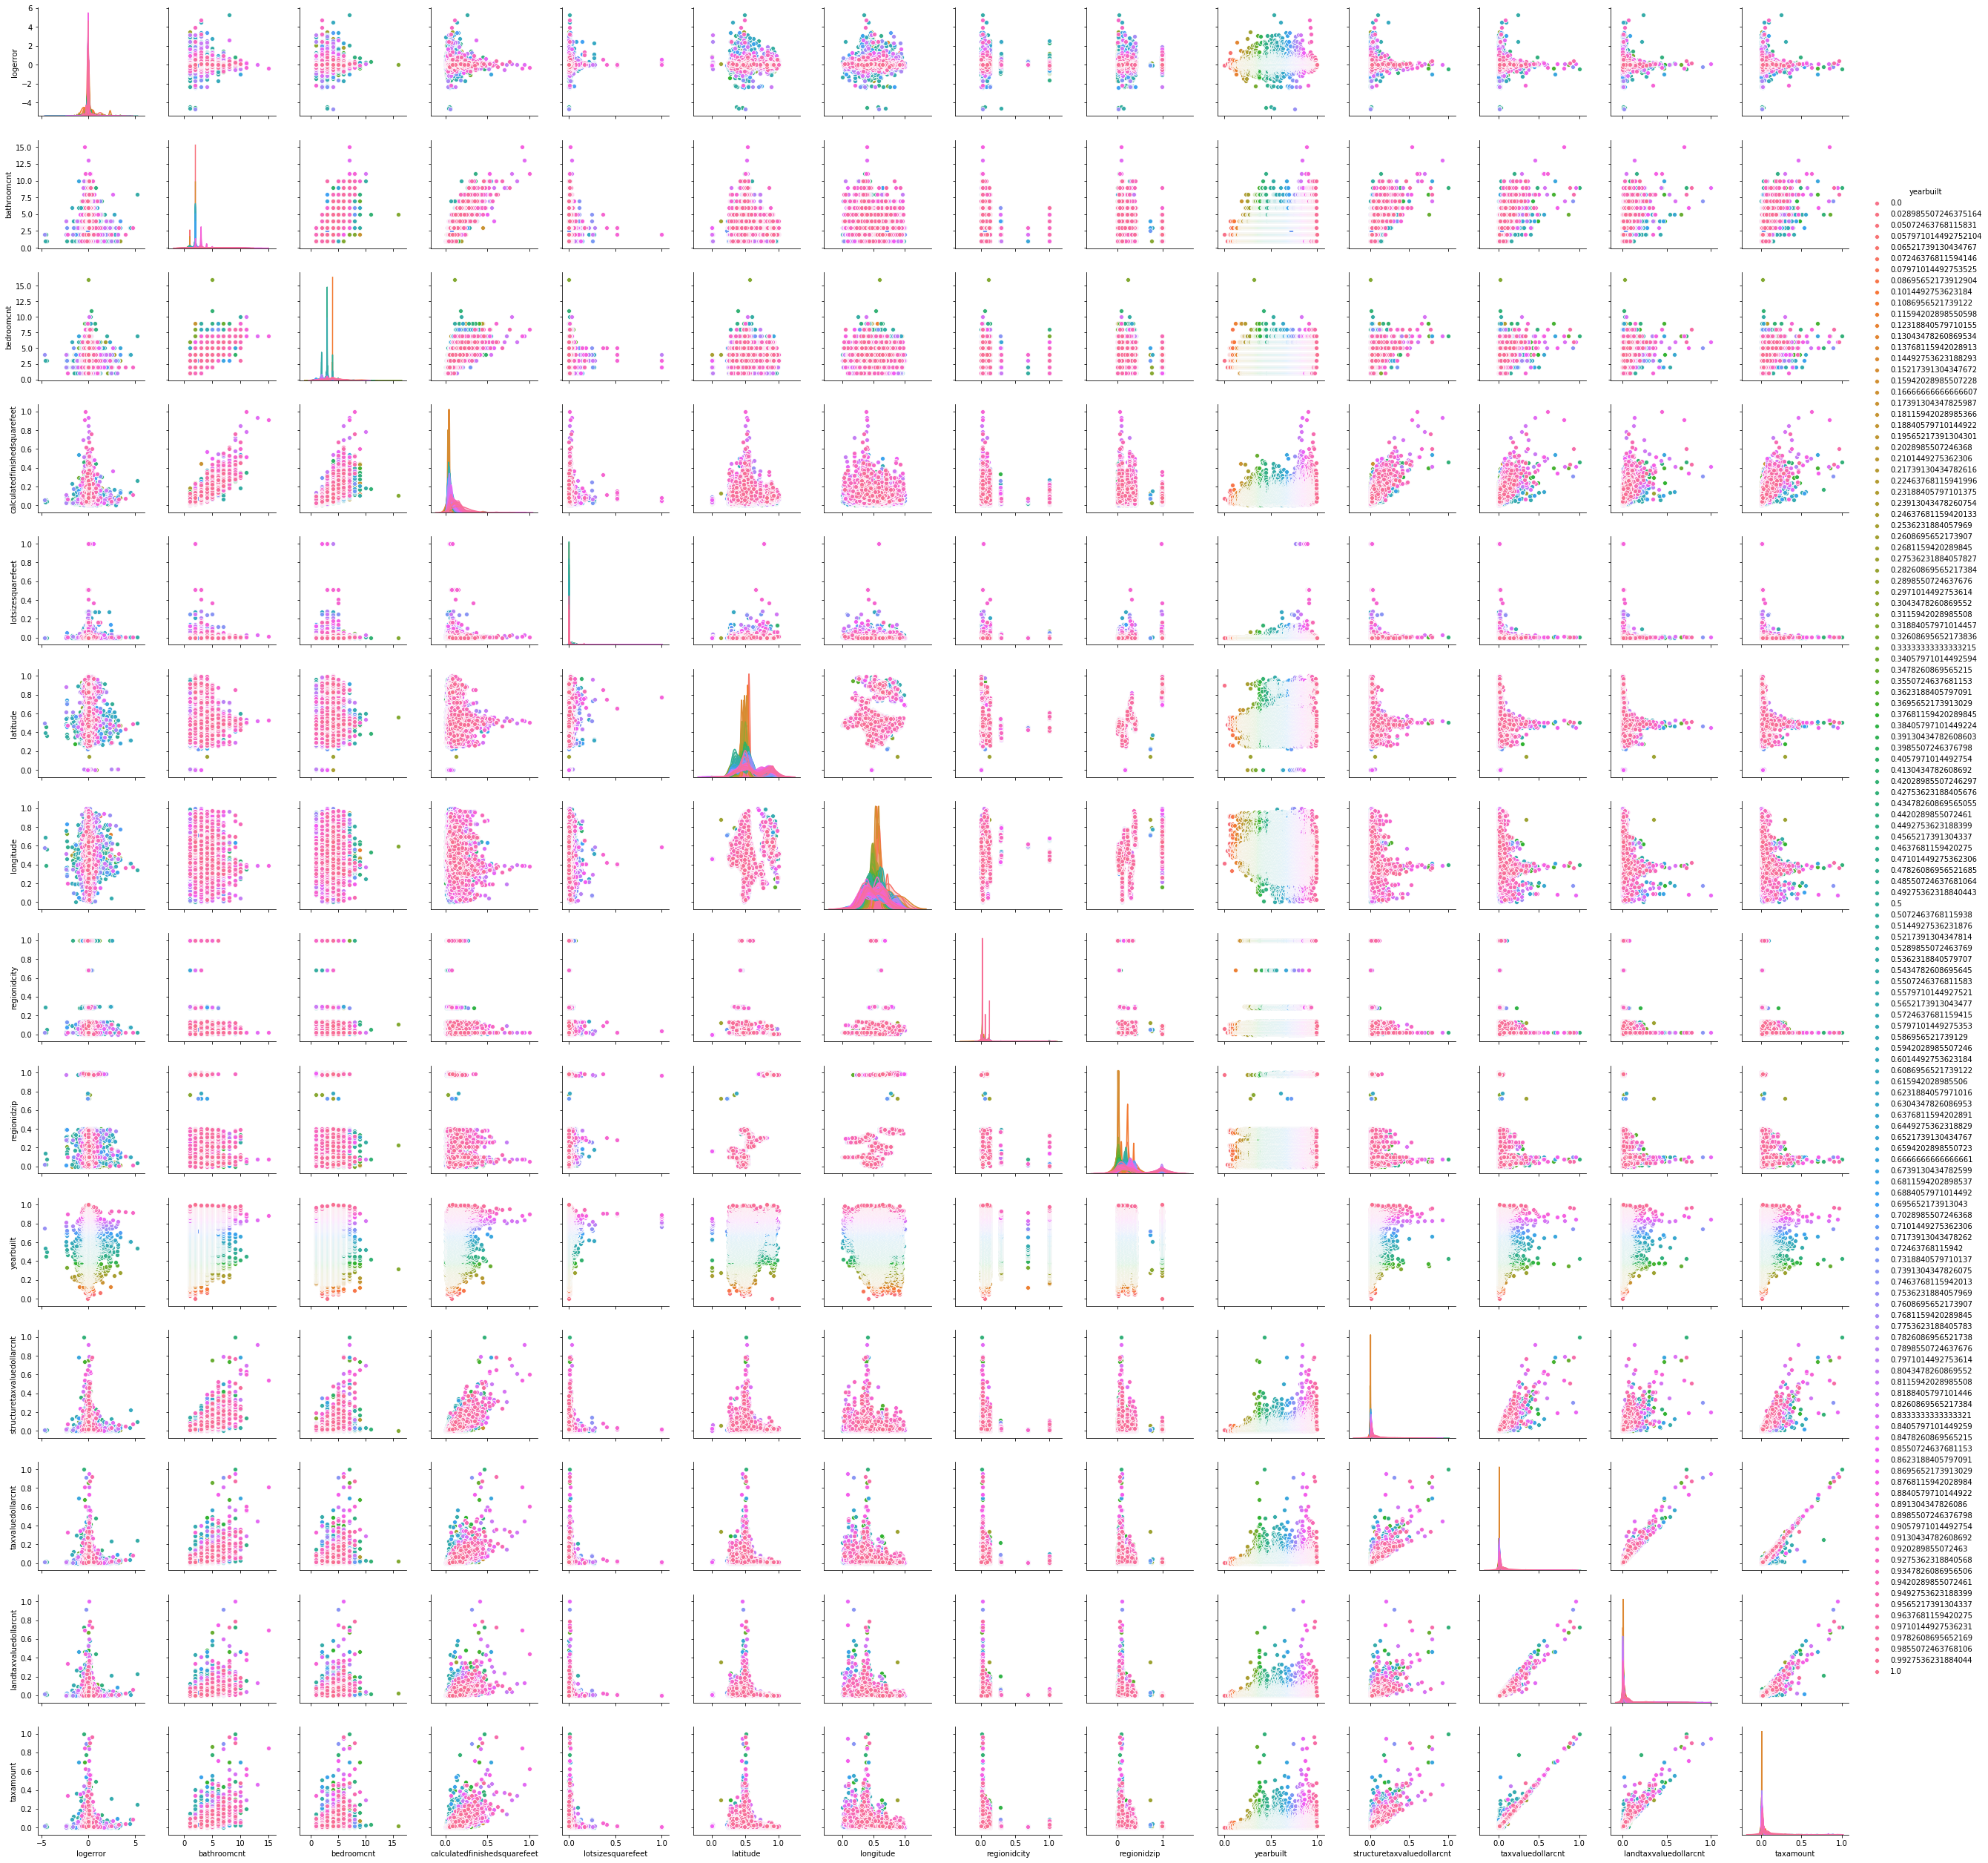

In [60]:
# sns.pairplot(pair_df, hue='yearbuilt')

sns.pairplot(df.loc[:,cols], hue='yearbuilt')


In [15]:
list(df.columns)

['parcelid',
 'logerror',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'lotsizesquarefeet',
 'latitude',
 'longitude',
 'regionidcity',
 'regionidzip',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'assessmentyear',
 'rawcensustractandblock',
 'censustractandblock']

# <span style= "color:red">3D plot with lat/long and logerror </span>

In [16]:
hue_type = ['yearbuilt']

def pairplot(df, col):
    sns.pairplot(df.loc[:,col], hue='yearbuilt')
    

In [17]:
scale_em = ['calculatedfinishedsquarefeet',
'lotsizesquarefeet',
'latitude',
'longitude',
'regionidcity',
'regionidzip',
'yearbuilt',
'structuretaxvaluedollarcnt',
'taxvaluedollarcnt',
'landtaxvaluedollarcnt',
'taxamount',
'assessmentyear',
'rawcensustractandblock',
'censustractandblock']

def scale_min_max_iris(df):
    scaler = MinMaxScaler()
    scaler.fit(df[scale_em])
    df[scale_em]=scaler.transform(df[scale_em])
    return df

In [18]:
scale_df = scale_min_max_iris(df)
scale_df

,parcelid,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,lotsizesquarefeet,latitude,longitude,regionidcity,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,assessmentyear,rawcensustractandblock,censustractandblock
0,11016594,0.03,2.00,3.00,0.07,0.00,0.64,0.33,0.02,0.28,0.59,0.01,0.01,0.01,0.02,0.00,0.00,0.00
2,12098116,-0.00,3.00,2.00,0.09,0.00,0.54,0.58,0.11,0.23,0.45,0.01,0.00,0.00,0.04,0.00,0.02,0.00
3,12643413,0.02,2.00,2.00,0.03,0.01,0.28,0.48,0.02,0.18,0.79,0.02,0.01,0.00,0.01,0.00,0.01,0.00
5,11509835,-0.27,4.00,4.00,0.13,0.00,0.36,0.40,0.07,0.09,0.75,0.09,0.09,0.06,0.08,0.00,0.02,0.00
6,12286022,0.04,1.00,2.00,0.05,0.00,0.38,0.55,0.05,0.08,0.44,0.01,0.00,0.00,0.01,0.00,0.02,0.00
10,10854446,0.38,2.00,2.00,0.06,0.00,0.56,0.34,0.02,0.33,0.55,0.01,0.00,0.00,0.00,0.00,0.00,0.00
11,11672170,-0.02,4.00,5.00,0.13,0.00,0.50,0.29,0.02,0.10,0.85,0.06,0.04,0.02,0.04,0.00,0.01,0.00
12,10949761,0.03,2.00,3.00,0.06,0.00,0.57,0.45,1.00,0.33,0.48,0.00,0.00,0.00,0.00,0.00,0.01,0.00
17,12524288,-0.04,1.00,1.00,0.02,0.02,0.30,0.63,0.11,0.19,0.67,0.01,0.00,0.00,0.00,0.00,0.02,0.00
19,10815909,0.01,3.00,3.00,0.07,0.00,0.56,0.30,0.02,0.29,0.52,0.01,0.01,0.01,0.02,0.00,0.00,0.00


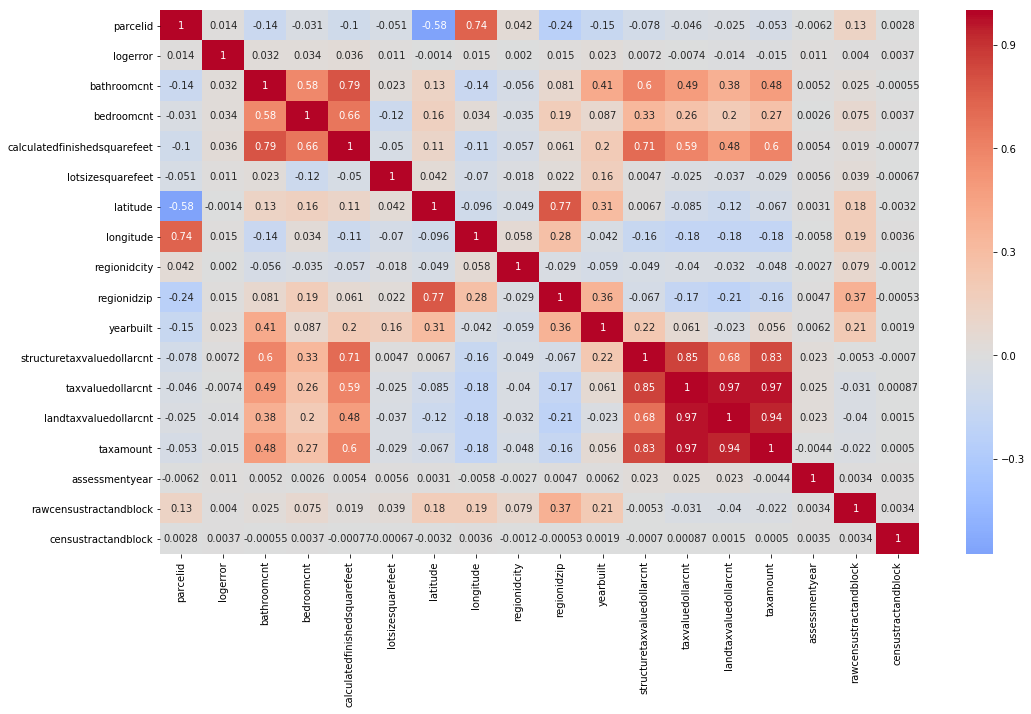

In [19]:
plt.figure(figsize=(17,10))
sns.heatmap(scale_df.corr(), cmap='coolwarm', annot=True, center=0)

In [20]:
# scale_df.groupby('bathroomcnt').plot.bar()

In [21]:
df.columns

Index(['parcelid', 'logerror', 'bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'latitude',
       'longitude', 'regionidcity', 'regionidzip', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount', 'assessmentyear',
       'rawcensustractandblock', 'censustractandblock'],
      dtype='object')

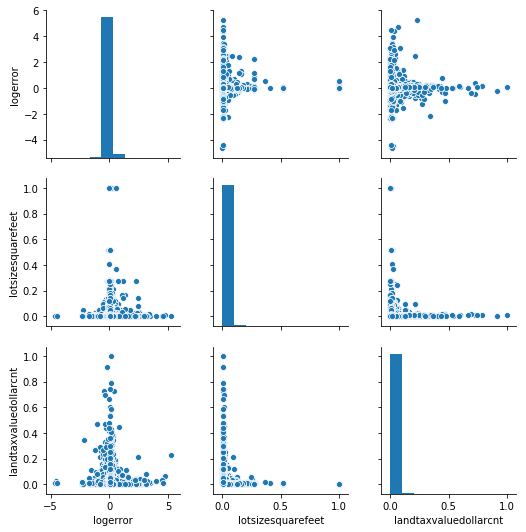

In [23]:
col_3 = list([
 'logerror',
 'lotsizesquarefeet',
 'landtaxvaluedollarcnt',])

sns.pairplot(df.loc[:,col_3])

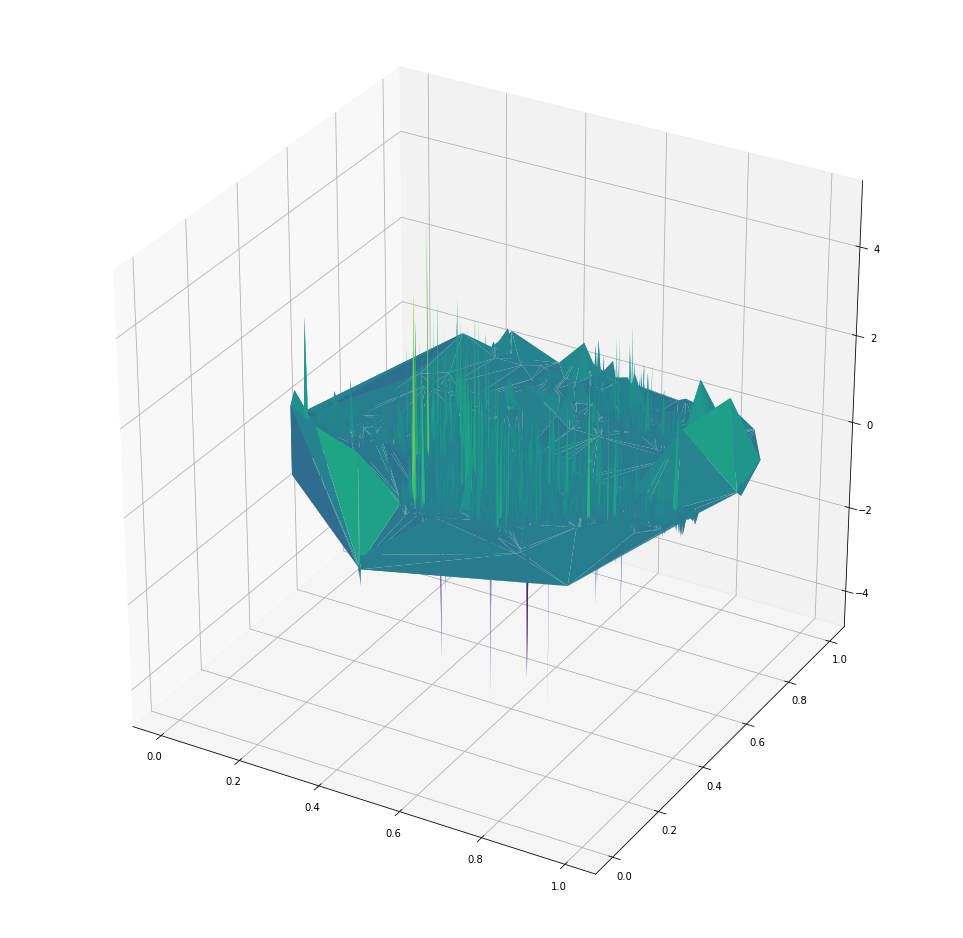

In [48]:
lat_long_df = df[['longitude', 'latitude', 'logerror']]


lat_long_df.columns=["longitude","latitude","logerror"]

# Make the plot
fig = plt.figure(figsize=(17, 17))
ax = fig.gca(projection='3d')
ax.plot_trisurf(lat_long_df['longitude'], lat_long_df['latitude'], lat_long_df['logerror'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()
 
# to Add a color bar which maps values to colors.
surf=ax.plot_trisurf(lat_long_df['longitude'], lat_long_df['latitude'], lat_long_df['logerror'], cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()
 
# Rotate it
ax.view_init(30, 45)
plt.show()
 
# Other palette
ax.plot_trisurf(lat_long_df['longitude'], lat_long_df['latitude'], lat_long_df['logerror'], cmap=plt.cm.jet, linewidth=0.01)
plt.show()


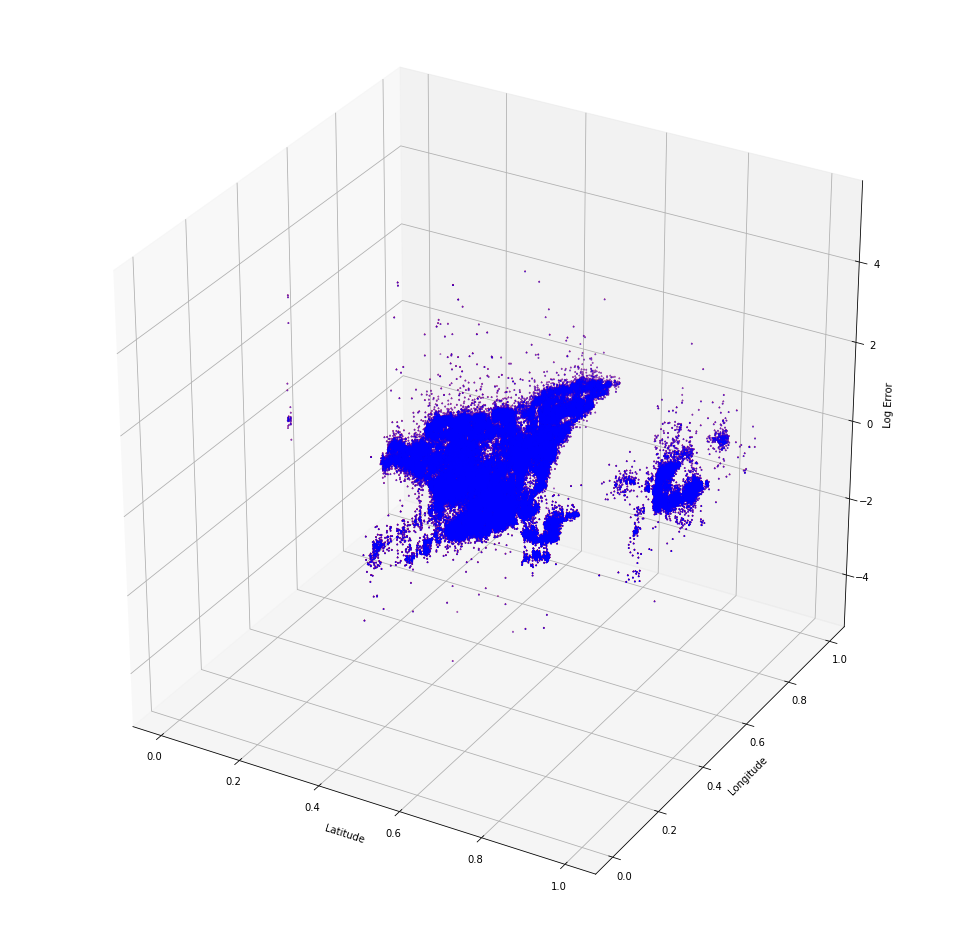

In [45]:
# # Fixing random state for reproducibility
# np.random.seed(19680801)


# def randrange(n, vmin, vmax):
#     '''
#     Helper function to make an array of random numbers having shape (n, )
#     with each number distributed Uniform(vmin, vmax).
#     '''
#     return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure(figsize=(17, 17))
ax = fig.add_subplot(111, projection='3d')

# n = 100

# # For each set of style and range settings, plot n random points in the box
# # defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
# for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
#     xs = randrange(n, 23, 32)
#     ys = randrange(n, 0, 100)
#     zs = randrange(n, zlow, zhigh)
#     ax.scatter(xs, ys, zs, c=c, marker=m)

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# plt.show()


for c, m, s in [('r', 'x', 1), ('b','^', 1)]:
    xs = scale_df.latitude
    ys = scale_df.longitude
    zs = scale_df.logerror
    ax.scatter(xs, ys, zs, c=c, marker=m, s=s)

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Log Error')

plt.show()



In [47]:
scale_df.shape

(92574, 18)

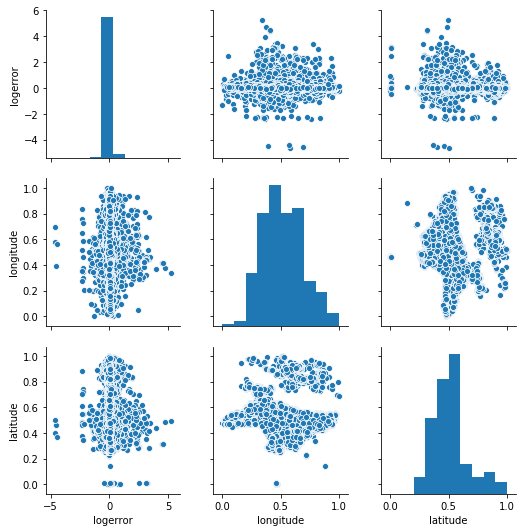

<Figure size 1224x1224 with 0 Axes>

In [50]:
col_4 = list([
 'logerror',
 'longitude',
 'latitude',])

sns.pairplot(df.loc[:,col_4])
fig = plt.figure(figsize=(17, 17))

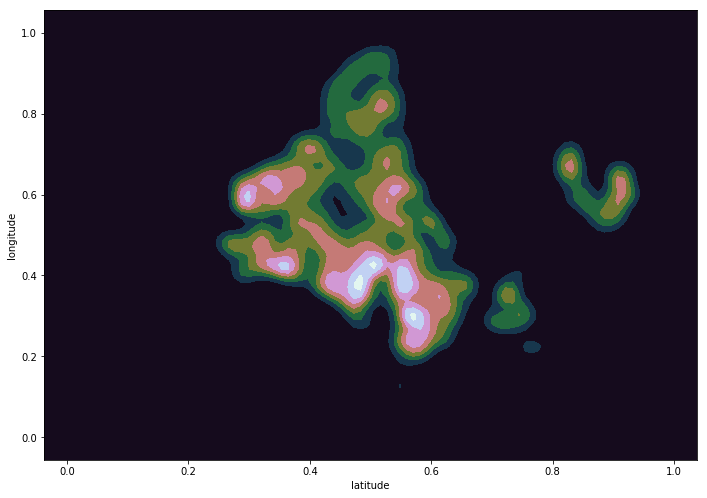

In [61]:
x, y = df.latitude, df.longitude
# ax = sns.kdeplot(x, y, shade=True, cmap="cubehelix")
ax = sns.kdeplot(x, y, shade=True, cmap="cubehelix")
fig.set_size_inches(11.7, 8.27)

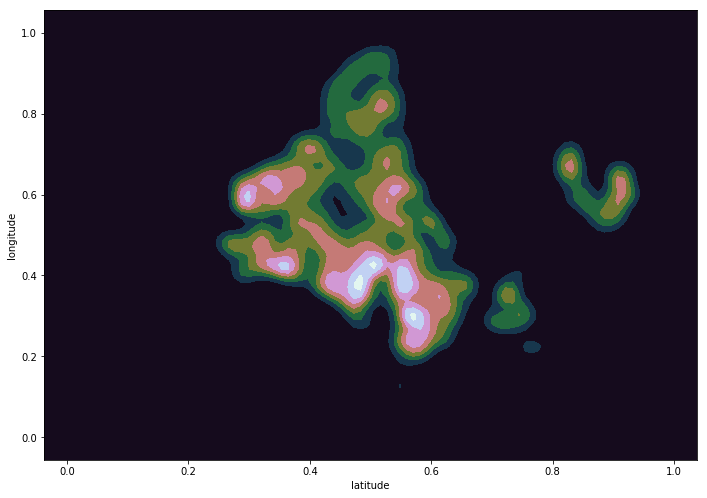

In [68]:
def kde_func(x ,y):
#     df.columns=[x,y]
#     x, y = df.x, df.y
    ax = sns.kdeplot(x, y, shade=True, cmap="cubehelix")
    fig.set_size_inches(11.7, 8.27)
    
kde_func(df.latitude, df.longitude)

# <span style="color:red"> Time to start clustering </span>

### Looking at the kde plot I can see several key points that I might want a centroid for clustering. I will run 4 kmeans looking at 5, 6, 7, 8, 9 and 10 centroids to see which is more accurate. My presumption is that 8 will be the most accurate, but because of how close the high levels of density are, and how spread out the low levels of density are looking at a lower and higher number of centroids is necessary.